In [ ]:
matplotlib有三个层次的API：
matplotlib.backend_bases.FigureCanvas：代表了一个绘图区，在这个绘图区上图表被绘制
matplotlib.backend_bases.Renderer：代表了渲染器，它知道如何在绘图区上绘图。
matplotlib.artist.Artist：代表了图表组件，它知道如何利用渲染器在绘图区上绘图。


matplotlib中有两种Artist：
primitive：代表了我们在绘图区域上绘制的基础的绘图组件，比如Line2D，Rectangle，Text 以及AxesImage等等。
container：代表了放置primitive的那些绘图组件。比如Axis、Axes以及Figure，如

matplotlib的标准使用流程为：
创建一个Figure实例对象fig
使用fig实例创建一个或者多个Axes实例，或者创建一个或者多个Subplot实例
使用Axes实例的方法来创建primitive

container Artist:
       Figure
matplotlib.figure.Figure是最顶层的container Artist，它包含了图表中的所有元素
Figure.patch属性：Figure的背景矩形
Figure.axes属性：持有的一个Axes实例的列表（包括Subplot)
Figure.images属性：持有的一个FigureImages patch列表
Figure.lines属性：持有一个Line2D实例的列表（很少使用）
Figure.legends属性：持有的一个Figure Legend实例列表（不同于Axes.legends)
Figure.patches属性：持有的一个Figure pathes实例列表（很少使用)
Figure.texts属性：持有的Figure Text实例列表

当你执行Figure.add_subplot()或者Figure.add_axes()时，这些新建的Axes都被添加到Figure.axes列表中。

由于Figure维持了current axes，因此你不应该手动的从Figure.axes列表中添加删除元素，而是要通过Figure.add_subplot()、Figure.add_axes()来添加元素，通过Figure.delaxes()来删除元素。但是你可以迭代或者访问Figure.axes中的Axes，然后修改这个Axes的属性。

可以通过Figure.gca()获取current axes，通过Figure.sca()设置current axes。

Figure也有它自己的text、line、patch、image。你可以直接通过add primitive语句直接添加。但是注意Figure默认的坐标系是以像素为单位，你可能需要转换成figure坐标系：(0,0)表示左下点，(1,1)表示右上点。




In [ ]:
Axes用于创建primitive Artist以及添加他们到相应的container中的方法：

ax.annotate()：创建text annotation（Annotate对象），然后添加到ax.texts列表中。
ax.bar()：创建bar chart（Rectangle对象），然后添加到ax.patches列表中。
ax.errorbar()：创建error bar plot（Line2D对象和Rectangle对象），然后添加到ax.lines
列表中和ax.patches列表中。
ax.fill()：创建shared area（Polygon对象），然后添加到ax.patches列表中
ax.hist()：创建histogram（Rectangle对象），然后添加到ax.patches列表中。
ax.imshow()：创建image data（AxesImage对象），然后添加到ax.images列表中。
ax.legend()：创建axes legends（Legend对象），然后添加到ax.legends列表中。
ax.plot()：创建xy plot（Line2D对象），然后添加到ax.lines列表中。
ax.scatter()：创建scatter charts（PolygonCollection对象），然后添加到
ax.collections列表中。
ax.text()：创建text（Text对象），然后添加到ax.texts列表中。

Axes还包含两个最重要的Artist container：

ax.xaxis：XAxis对象的实例，用于处理x轴tick以及label的绘制
ax.yaxis：YAxis对象的实例，用于处理y轴tick以及label的绘制


Axes 的一些方法:
corr(x, **kwargs)：绘制序列x的自相关。

x：一个标量序列。对x执行自相关
normed：一个布尔值，如果为True，则对数据正则化处理
maxlags：一个整数，默认为10.它给出了要展示多少个lag。如果为None，则使用所有的2*len(x)-1个
其他kwargs：控制了Line2D的属性


add_artist(a)：添加a（一个Artist对象）到axes上

add_collection(collection, autolim=True)：添加Collection实例到axes上

add_container(container)：添加Container实例到axes上

add_image(image)：添加Image实例到axes上

add_line(line)：添加Line2D实例到axes上

add_patch(p)：添加Patch实例到axes上

add_table(tab)：添加Table实例到axes上

annotate(*args, **kwargs)：对坐标点(x,y)绘制注解。

In [1]:
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
import matplotlib as mp
print(mp.rcParams). # 默认配置，可以根据需要进行修改
matplotlib.rcdefaults() #将所有配置重置为标准设置

In [ ]:
import matplotlib.pyplot as plt 
fig = plt.figure()  # 创建图形
fig.patch  # 图表矩形
ax = fig.add_axes([0,0,2,1]) # AXes矩形 可以调节上下左右宽度
mp.artist.getp(fig) # 获取所以属性

<AxesSubplot:>

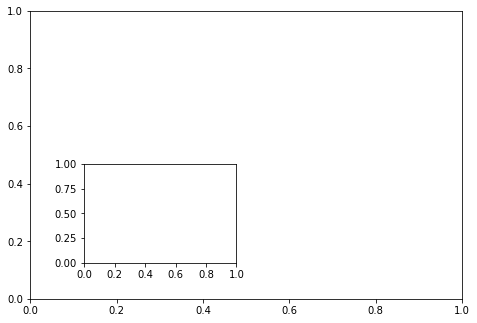

In [16]:
fig = plt.figure()  # 创建图形
fig.patch  # 图表矩形
ax = fig.add_axes([0,0,1,1]) # AXes矩形 可以调节上下左右宽度
ax2 = fig.add_subplot(223)
fig.axes
fig.patch
fig.legends
fig.lines
fig.patches
fig.texts
fig.gca()

<class 'matplotlib.axes._axes.Axes'>


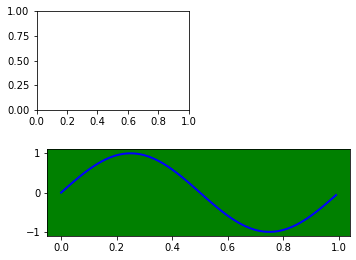

In [26]:
import numpy as np
fig = plt.figure()
ax  = fig.add_axes([0.15,0.1,0.7,0.3])
print(type(ax))
t= np.arange(0.0,1.0,0.01)
s = np.sin(2*np.pi*t)
ax2 = fig.add_subplot(221)
rect = ax.patch # axex 的rectangle
rect.set_color('green') #设置背景颜色
line, = ax.plot(t,s,color='blue',lw=2)

[  4.   7.  24.  21.  44.  53.  76. 109. 113. 121. 120. 100.  83.  54.
  32.  19.   8.   7.   2.   3.]
[-2.9125516  -2.60392249 -2.29529339 -1.98666428 -1.67803517 -1.36940606
 -1.06077695 -0.75214784 -0.44351873 -0.13488962  0.17373949  0.4823686
  0.79099771  1.09962682  1.40825593  1.71688504  2.02551415  2.33414325
  2.64277236  2.95140147  3.26003058]
<BarContainer object of 20 artists>
[<matplotlib.patches.Rectangle object at 0x7fdfa15fdb50>, <matplotlib.patches.Rectangle object at 0x7fdf9158a2b0>, <matplotlib.patches.Rectangle object at 0x7fdfa15fdf40>, <matplotlib.patches.Rectangle object at 0x7fdfa160c250>, <matplotlib.patches.Rectangle object at 0x7fdfa160c520>, <matplotlib.patches.Rectangle object at 0x7fdfa160c7f0>, <matplotlib.patches.Rectangle object at 0x7fdfa160cac0>, <matplotlib.patches.Rectangle object at 0x7fdfa160cd90>, <matplotlib.patches.Rectangle object at 0x7fdfa161a0a0>, <matplotlib.patches.Rectangle object at 0x7fdfa161a370>, <matplotlib.patches.Rectangle obje

<ipython-input-36-bd50c855d8d7>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


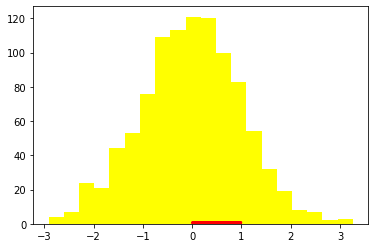

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
x, y = np.random.rand(2,100)
line ,  = ax.plot(x,y,'-',color='red',linewidth=2)
n, bins, rectangle = ax.hist(np.random.randn(1000),20,facecolor='yellow')
print(n)
print(bins)
print(rectangle)
print(ax.patches)
fig.show()

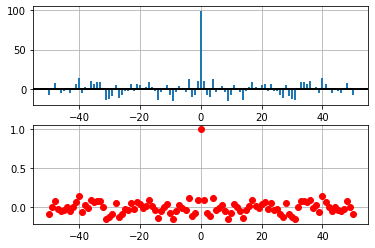

In [53]:
x , y = np.random.randn(2,100)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.acorr(x,usevlines=True,maxlags = 50,normed=False,lw=2) # 序列模型
ax1.grid(True)
ax1.axhline(0,color='black',lw =2)

ax2 = fig.add_subplot(212,sharex= ax1)
ax2.acorr(x,usevlines=False,maxlags = 50,normed=True,lw=2,color='red') # 序列模型
ax2.grid(True)
ax1.axhline(0,color='black',lw =2)

<ipython-input-66-015f43173270>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


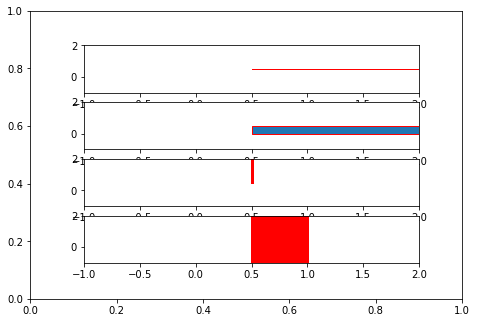

In [66]:
# axhline(y=0, xmin=0, xmax=1, **kwargs)：绘制水平线
# 画横线
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) 
ax = fig.add_subplot(411)
ax.axhline(y=0.5,xmin=0.5,xmax=1.5 ,lw=1,color='red')
ax.set_xlim(-1,2)
ax.set_ylim(-1,2)
# 横 画一个区域
ax2 = fig.add_subplot(412)
ax2.axhspan(ymin=0,ymax=0.5,xmin=0.5,xmax=1.5 ,lw=1,edgecolor='red')
ax2.set_xlim(-1,2)
ax2.set_ylim(-1,2)
# 垂直 一个线
ax3 = fig.add_subplot(413)
ax3.axvline(x=0.5,ymin=0.5,ymax=1.5 ,lw=3,color='red')
ax3.set_xlim(-1,2)
ax3.set_ylim(-1,2)
# 垂直一个区域
ax4 = fig.add_subplot(414)
ax4.axvspan(ymin=0,ymax=1.5,xmin=0.5,xmax=1,lw=3,color='red')
ax4.set_xlim(-1,2)
ax4.set_ylim(-1,2)
fig.show()

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(211)
ax.bar(1,left =-1 ,height = 0.5,width = 0.2,bottom=0.4,color='green',edgecolor='red',lw=2,
      tick_label = 'barhoz',xerr=0.2,yerr=0.3,ecolor='orange',capsize=8,align='center')